# PROJET 6 : Analysez les ventes d'une librairie avec R ou Python

## I- IMPORTATION DES LIBRAIRIES ET DES DONNEES 

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats

In [128]:
from warnings import filterwarnings
filterwarnings('ignore')  # code optionnel

## 1- Importation de la DataFrame customers

### 1-a Utilisation de methodes, .info(), .shape, .rename() pour observer la dataframe

In [129]:
customers = pd.read_csv('customers.csv')

# customers = Clients

In [130]:
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [131]:
customers.shape

(8623, 3)

In [132]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [133]:
customers = customers.rename(columns={'birth':'birthday'})

### 1-b Utilisation de methodes .loc[] , .duplicated() , .drop_duplicates() pour observer l'unicité de clé primaire

In [134]:
customers.loc[customers[['client_id']].duplicated(keep=False)]

# Unicité de clé primaire

,client_id,sex,birthday


In [135]:
customers.loc[customers[['client_id','sex','birthday']].duplicated(keep=False)]

,client_id,sex,birthday


In [136]:
customers.drop_duplicates(subset=['client_id','sex','birthday'], inplace=True, ignore_index=True)

In [137]:
customers

,client_id,sex,birthday
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


## 2- Importation de la DataFrame products

### 2-a Utilisation de methodes, .info(), .shape, .rename() pour observer la dataframe

In [138]:
products = pd.read_csv('products.csv')

In [139]:
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [140]:
products.shape

(3287, 3)

In [141]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [142]:
products = products.rename(columns={'id_prod':'id_product', 'categ':'category'})

###  2-b Utilisation de methodes .loc[] , .duplicated() , .drop_duplicates() pour observer l'unicité de clé primaire

In [143]:
products.loc[products[['id_product']].duplicated(keep=False)]

# Unicité de clé primaire

,id_product,price,category


In [144]:
products.loc[products[['id_product','price','category']].duplicated(keep=False)]

,id_product,price,category


In [145]:
products.drop_duplicates(subset=['id_product','price','category'], inplace=True, ignore_index=True)

In [146]:
products

,id_product,price,category
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


##  3- Importation de la DataFrame transactions

### 3-a Utilisation de methodes, .info(), .shape, .rename() pour observer la dataframe

In [147]:
transactions = pd.read_csv('transactions.csv')

In [148]:
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [149]:
transactions.shape

(679532, 4)

In [150]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [151]:
transactions = transactions.rename(columns={'id_prod':'id_product'})

### 3-b Utilisation de methodes, .sort_values(), .startswith(), .to_datetime() pour definir le bon format de date

In [152]:
transactions.sort_values("date")

,id_product,date,session_id,client_id
480642,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
428477,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
462702,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
488300,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
439073,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
392443,T_0,test_2021-03-01 02:30:02.237448,s_0,ct_0
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
573155,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0


In [153]:
transactions = transactions[~transactions.date.str.startswith("test")]

# filtration selon les lignes avec un test boolean qui renvoie le format de date en vrai et le format test_date en faux
# La fonction startswith() est utilisée pour vérifier si une phrase donnée commence par une string particulière.

In [154]:
transactions['date'] = pd.to_datetime(transactions['date'],format='%Y-%m-%d %H:%M:%S')

In [155]:
transactions

,id_product,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


## II- RAPPROCHEMENT DES DATAFRAMES

## 1- Jointure externe des dataframes et observation des valeurs manquantes

In [156]:
df_transactions_customers = pd.merge(transactions,customers, on='client_id', how='outer')

In [157]:
df_transactions_customers

,id_product,date,session_id,client_id,sex,birthday
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,f,1986
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,f,1986
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,f,1986
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,f,1986
...,...,...,...,...,...,...
679350,NaN,NaT,NaN,c_7584,f,1960
679351,NaN,NaT,NaN,c_90,m,2001
679352,NaN,NaT,NaN,c_587,m,1993
679353,NaN,NaT,NaN,ct_1,m,2001


On observe que les customers qui sont repertoriés ici presentent des valeurs nulles (NaN) au niveau des transactions.
parce que, il n'y a aucune transaction lié a ses customers. donc ses valeurs nulles peuvent etre suprimers

In [158]:
df_transactions_customers_products = pd.merge(df_transactions_customers,products, on='id_product', how='outer')

In [159]:
df_transactions_customers_products

,id_product,date,session_id,client_id,sex,birthday,price,category
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0
...,...,...,...,...,...,...,...,...
679372,0_1624,NaT,NaN,NaN,NaN,NaN,24.50,0.0
679373,2_86,NaT,NaN,NaN,NaN,NaN,132.36,2.0
679374,0_299,NaT,NaN,NaN,NaN,NaN,22.99,0.0
679375,0_510,NaT,NaN,NaN,NaN,NaN,23.66,0.0


On observe également ici les produits qui n'ont pas été vendu presentent des valeurs nulles au niveau des transactions. parce que, il n'y a aucune transaction lié a ses produits. Par consequent, ses valeurs nulles peuvent etre suprimers

In [160]:
df_transactions_customers_products.isnull().sum()

id_product     23
date           45
session_id     45
client_id      22
sex            22
birthday       22
price         244
category      244
dtype: int64

### 1-a Utilisation de la methode .dropna() pour suprimer les valeurs nulles

In [161]:
df_transactions_customers_products = df_transactions_customers_products.dropna()

# supressions des valeurs NaN

In [162]:
df_transactions_customers_products

,id_product,date,session_id,client_id,sex,birthday,price,category
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0
...,...,...,...,...,...,...,...,...
679327,1_408,2023-01-26 06:52:02.225335,s_332548,c_7402,m,1945.0,35.24,1.0
679328,1_408,2022-11-26 06:52:02.225335,s_302962,c_7402,m,1945.0,35.24,1.0
679329,1_408,2021-09-26 06:52:02.225335,s_95708,c_7402,m,1945.0,35.24,1.0
679330,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,m,1993.0,86.99,2.0


## III- REPONSES AUX MAIL D' Antoine et Annabelle

## 1- Analysons les indicateurs autour du chiffre d'affaires

### 1-a Indicateur et graphique autour du chiffre d'affaires

In [163]:
chiffre_affaires = round(df_transactions_customers_products['price'].sum(),2)

In [164]:
chiffre_affaires

11853728.68

### 1-b Boite à moustaches pour observer les valeus abérantes du chiffre d'affaires

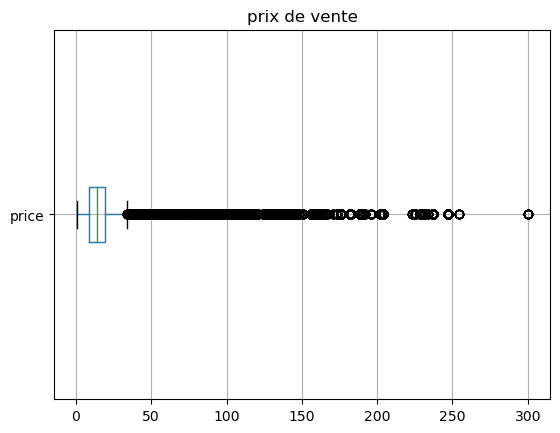

In [165]:
df_transactions_customers_products.boxplot(column='price', vert=False).set_title('prix de vente')
plt.show()

In [166]:
# CA = Prix * Quantité de produit vendu
  # Observons les valeurs aberantes de la vraibles price
    

# Fonction pour determiner les outliers
# Valeur < Q1 - 1.5IQR ou Valeur > Q3 + 1.5IQR alors on a les outliers
def finding_outliers(data, variable_name):
    '''
    data = data frame pandas
    variable_name= nom de la variable (chaine de caractere)
    '''
    # Calcul de l'IQR Q1 et Q3
    iqr = stats.iqr(data[variable_name])
    q1 = data[variable_name].quantile(0.25)
    q3 = data[variable_name].quantile(0.75)
    # Calcul de limite de Q1 - 1.5IQR et Q3 + 1.5IQR
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    # Dataframe des valeurs aberantes 
    outliers_df = data[(data[variable_name]<lower) | (data[variable_name]>upper)]
    return outliers_df

In [167]:
# point de données aberants de la variable indiquant le price

finding_outliers(data = df_transactions_customers_products, variable_name = 'price').sort_values(by=['price'])

,id_product,date,session_id,client_id,sex,birthday,price,category
644933,1_306,2021-03-05 11:15:54.180721,s_2060,c_4198,m,1976.0,34.18,1.0
644918,1_306,2022-01-19 18:55:10.341281,s_152241,c_1609,m,1980.0,34.18,1.0
644920,1_306,2021-09-20 16:23:45.251232,s_92829,c_3030,m,1989.0,34.18,1.0
644921,1_306,2021-12-24 02:38:30.619934,s_139069,c_344,m,1965.0,34.18,1.0
644922,1_306,2022-06-07 16:04:40.987717,s_220257,c_3090,f,1974.0,34.18,1.0
...,...,...,...,...,...,...,...,...
620055,2_2,2022-11-28 21:24:28.442508,s_304241,c_659,f,2001.0,300.00,2.0
620061,2_2,2022-12-06 23:14:33.815188,s_308128,c_2467,f,1997.0,300.00,2.0
620060,2_2,2021-06-06 23:14:33.815188,s_45088,c_2467,f,1997.0,300.00,2.0
620058,2_2,2021-06-12 08:44:00.882917,s_47558,c_5237,m,1999.0,300.00,2.0


### 1-c les parametres statistiques autour du chiffre d'affaires

In [168]:
# les parametres statistiques de la variable price

df_transactions_customers_products.price.describe()

# std 38.17 est l'ecart_type empirique

count    679111.000000
mean         17.454773
std          18.328998
min           0.620000
25%           8.870000
50%          13.990000
75%          18.990000
max         300.000000
Name: price, dtype: float64

In [169]:
df_transactions_customers_products['price'].median()

13.99

In [170]:
df_transactions_customers_products['price'].mode()

0    15.99
Name: price, dtype: float64

In [171]:
df_transactions_customers_products['price'].var()

335.9521496858729

In [172]:
df_transactions_customers_products['price'].var(ddof=0)

# la variance empirique corrigée

335.95165499185424

In [173]:
df_transactions_customers_products['price'].std()/df_transactions_customers_products['price'].mean()

# le coefficient de variation

1.0500850967081807

In [174]:
df_transactions_customers_products['price'].skew()

5.39035882716777

Le skewness est une mesure d'asymétrie. L’asymétrie d’une distribution traduit la régularité (ou non) avec laquelle les observations se répartissent autour de la valeur centrale. On interprète cette mesure de cette manière :
- Si γ1 = 0 alors la distribution est symétrique.
- Si γ1 > 0 alors la distribution est étalée à droite.
- Si γ1 < 0 alors la distribution est étalée à gauche.

In [175]:
df_transactions_customers_products['price'].kurtosis()

43.06872482413128

Le kurtosis empirique n'est pas une mesure d'asymétrie, mais c'est une mesure d'aplatissement. L’aplatissement peut s’interpréter à la condition que la distribution soit symétrique. En fait, on compare l'aplatissement par rapport à la distribution la plus célèbre, appelée distribution normale (parfois "courbe de Gauss" ou "Gaussienne")
- Si γ2 = 0, alors la distribution a le même aplatissement que la distribution normale.
- Si γ2 > 0, alors elle est moins aplatie que la distribution normale : les observations sont plus concentrées.
- Si γ2 < 0, alors les observations sont moins concentrées : la distribution est plus aplatie.

## 2- Peux-tu également regarder l’évolution dans le temps et mettre en place une décomposition en moyenne mobile pour évaluer la tendance globale ?

### 2-a Utilisation de methodes, .sort_values(), .apply() pour definir un nouveau format de date adapter 

In [176]:
 df_transactions_customers_products.sort_values(by=['date'])

,id_product,date,session_id,client_id,sex,birthday,price,category
191139,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967.0,11.99,0.0
2269,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960.0,19.37,0.0
441509,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988.0,4.50,0.0
446670,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989.0,6.55,0.0
67108,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956.0,16.49,0.0
...,...,...,...,...,...,...,...,...
510204,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996.0,21.92,1.0
271337,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994.0,48.99,2.0
225071,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985.0,26.99,1.0
3230,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953.0,8.99,0.0


In [177]:
df_transactions_customers_products['date_'] =  df_transactions_customers_products['date'].apply(lambda x : x.strftime('%Y-%m-%d'))

In [178]:
df_transactions_customers_products

,id_product,date,session_id,client_id,sex,birthday,price,category,date_
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,2022-05-20
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0,2021-07-20
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0,2022-08-20
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0,2021-05-09
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0,2022-05-30
...,...,...,...,...,...,...,...,...,...
679327,1_408,2023-01-26 06:52:02.225335,s_332548,c_7402,m,1945.0,35.24,1.0,2023-01-26
679328,1_408,2022-11-26 06:52:02.225335,s_302962,c_7402,m,1945.0,35.24,1.0,2022-11-26
679329,1_408,2021-09-26 06:52:02.225335,s_95708,c_7402,m,1945.0,35.24,1.0,2021-09-26
679330,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,m,1993.0,86.99,2.0,2022-02-19


### 2-b Courbe d'evolution du chiffre d'affaires journalier

In [179]:
CA_journalier = df_transactions_customers_products[['price', 'date_']].groupby('date_').sum()

In [180]:
CA_journalier

,price
date_,
2021-03-01,16565.22
2021-03-02,15486.45
2021-03-03,15198.69
2021-03-04,15196.07
2021-03-05,17471.37
...,...
2023-02-24,15207.89
2023-02-25,15761.25
2023-02-26,16304.72


<Figure size 1200x500 with 0 Axes>

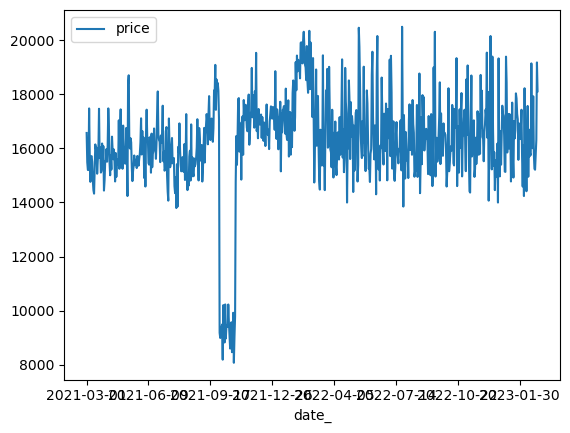

In [181]:
plt.figure(figsize = (12,5))

CA_journalier.plot()
plt.show()

In [182]:
# Moyennes mobiles sur 2 mpois    
    # MA = moving average = moyenne mobile   

# Moyennes mobiles sur 2 mpois

CA_journalier['MA 60'] = CA_journalier['price'].rolling(60).mean()   

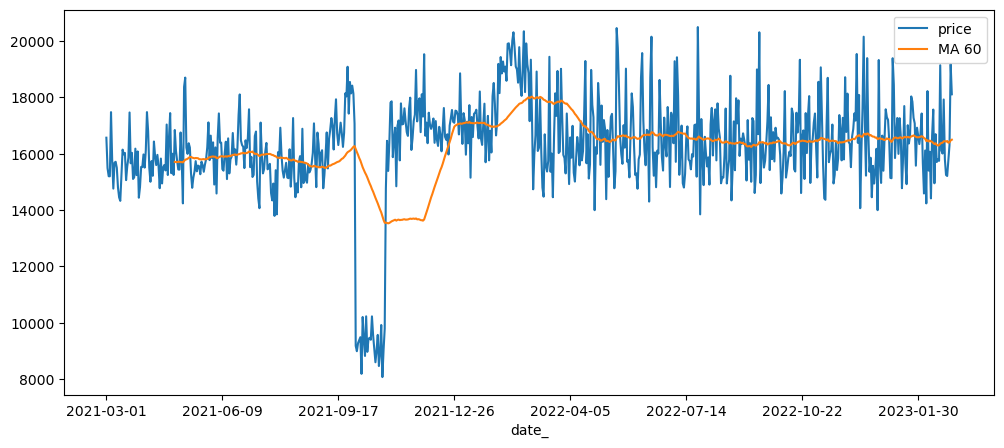

In [183]:
# Visualisation de la serie temporelle crée
    # Variable qu'on veut representer(MA 60)    
    
vars = ['price', 'MA 60']

# Graphique

CA_journalier[vars].plot(figsize = (12, 5))
plt.show()

En analysant l'évolution dans le temps de nos données, nous avons remarqué une baisse considérable sur la période d'Octobre 2021. ce qui nous a amené à mettre en place une décomposition en moyenne mobile avec Python pour évaluer la tendance globale. La décomposition a montré que la tendance à long terme était constante. En utilisant cette analyse, nous allons continuer à surveiller ces données pour déterminer si cette une chute soudaine qui a eu lieu en Octobre 2021 peut être expliquée.

### 2-c Determinons les courbes d'evolutions par catégorie pour expliquer la baisse du chiffre d'affaires

In [184]:
courbe_evolution_categorie = df_transactions_customers_products[['price', 'date_',
                                                                 'category']].groupby(['date_','category']).sum()

# Ici nous avons calculé la somme de commande par catégorie

In [185]:
courbe_evolution_categorie = courbe_evolution_categorie.reset_index().pivot_table(index = 'date_',
                                                                                  values ='price', columns = 'category')

In [186]:
courbe_evolution_categorie

category,0.0,1.0,2.0
date_,,,
2021-03-01,6262.65,6811.53,3491.04
2021-03-02,6718.27,5627.15,3141.03
2021-03-03,6121.03,5691.41,3386.25
2021-03-04,5891.48,6098.98,3205.61
2021-03-05,5975.97,7071.21,4424.19
...,...,...,...
2023-02-24,6197.92,5471.07,3538.90
2023-02-25,4942.69,8050.61,2767.95
2023-02-26,5522.90,7009.09,3772.73


<Figure size 1200x800 with 0 Axes>

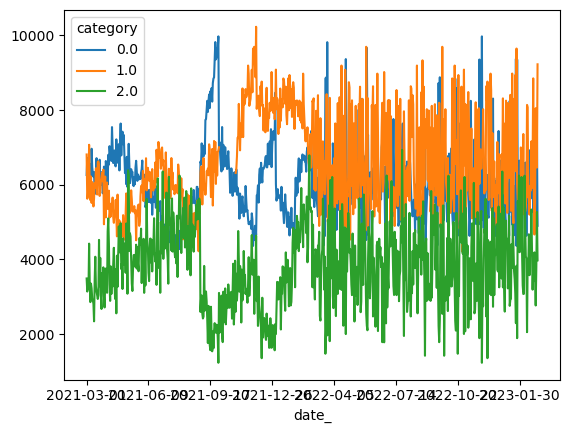

In [187]:
plt.figure(figsize = (12,8))

courbe_evolution_categorie.plot()
plt.show()

In [188]:
courbe_evolution_categorie = df_transactions_customers_products[['price',
                                                                 'date_', 'category']].groupby(['date_','category']).count()

# Ici nous avons compté le nombre de commande par catégorie

In [189]:
courbe_evolution_categorie = courbe_evolution_categorie.reset_index().pivot_table(index = 'date_',
                                                                                  values ='price', columns = 'category')

In [190]:
courbe_evolution_categorie

category,0.0,1.0,2.0
date_,,,
2021-03-01,581.0,335.0,46.0
2021-03-02,620.0,276.0,43.0
2021-03-03,591.0,280.0,40.0
2021-03-04,563.0,297.0,43.0
2021-03-05,561.0,331.0,51.0
...,...,...,...
2023-02-24,576.0,271.0,47.0
2023-02-25,458.0,401.0,46.0
2023-02-26,508.0,329.0,53.0


<Figure size 1200x800 with 0 Axes>

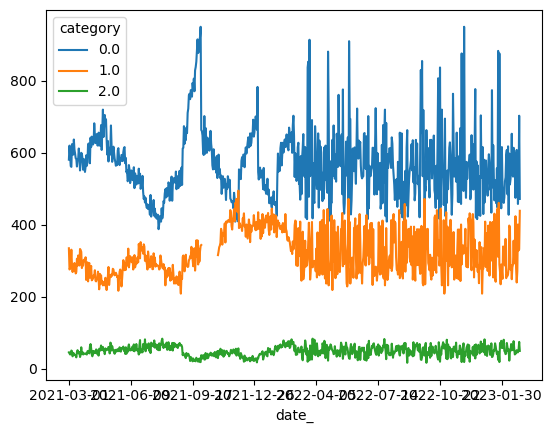

In [191]:
plt.figure(figsize = (12,8))

courbe_evolution_categorie.plot()
plt.show()

In [192]:
# Trouver les valeurs nulles

null_values = courbe_evolution_categorie.isnull()

In [193]:
# Compter le nombre de valeurs nulles pour chaque colonne

null_count = null_values.sum()
null_count

category
0.0     0
1.0    26
2.0     0
dtype: int64

In [194]:
null_values = courbe_evolution_categorie[[1.0]].isnull()

In [195]:
null_values.head(245)

category,1.0
date_,
2021-03-01,False
2021-03-02,False
2021-03-03,False
2021-03-04,False
2021-03-05,False
...,...
2021-10-27,True
2021-10-28,False
2021-10-29,False


La courbe de la categorie 1 présente une discontinuité sur la periode d'Octobre 2021, plus precisement du 2021-10-02 au 2021-10-27 dans sa progression, indiquant une période de diminution des valeurs. Toutefois, cette interruption est suivie d'une reprise significative des valeurs, signalant une reprise du phénomène représenté par la courbe.
Par conséquent,  l'évolution dans le temps de nos données (chiffre d'affaire journalier) chute soudainement sur la période de 2021-10-02 au 2021-10-27 à cause d'une absance de commande passer par nos clients. C'est ce qui explique la baisse du chiffre d'affaire 

## 3-  Il serait également intéressant de faire un zoom sur les références, pour voir un peu les tops et les flops, la répartition par catégorie.

### 3-a Determinons les flops et les tops 

In [196]:
tops_flops_produits = (df_transactions_customers_products.
                                           groupby('id_product').
                                           count()[['price']] )

In [197]:
tops_flops_produits = tops_flops_produits.sort_values(by=['price'])

In [198]:
tops_flops_produits.head(10)

# Les 10 Flops

,price
id_product,
0_2201,1
0_1601,1
0_549,1
2_81,1
0_807,1
0_1683,1
0_1151,1
0_1633,1
0_833,1


In [199]:
tops_flops_produits.tail(10)

# Les 10 Tops

,price
id_product,
1_407,1935
1_406,1939
1_413,1945
1_412,1951
1_403,1960
1_425,2096
1_498,2128
1_414,2180
1_417,2189


### 3-b La repartition par categorie

In [200]:
# La repartition par categorie

repatition_category = df_transactions_customers_products['category'].value_counts(normalize=True)

In [201]:
repatition_category

0.0    0.611769
1.0    0.334509
2.0    0.053722
Name: category, dtype: float64

## 4- Enfin, j’aimerais avoir quelques informations sur les profils de nos clients, et également la répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz.

###  4-a Les informations sur les profils de nos clients

In [202]:
df_transactions_customers_products['sex'].value_counts(normalize=True)

m    0.501871
f    0.498129
Name: sex, dtype: float64

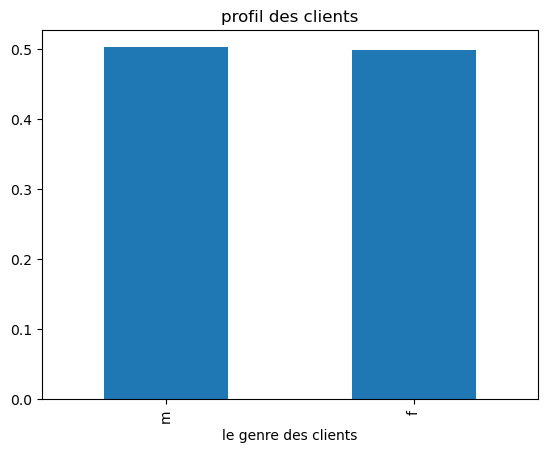

In [203]:
# Representons nos clients à l'aide 
   # d'un diagramme en tuyaux d'orgues ou diagramme en barre 

df_transactions_customers_products['sex'].value_counts(normalize=True).plot(kind='bar', title='profil des clients')
plt.xlabel('le genre des clients')
plt.ylabel('')
plt.show()

### 4-b La répartition du chiffre d'affaires entre les clients

In [204]:
repartition_CA_clients = round(df_transactions_customers_products.
                               groupby('client_id').
                               sum() [['price']], 2)

In [205]:
repartition_CA_clients = repartition_CA_clients.sort_values(by=['price'])

In [206]:
repartition_CA_clients

,price
client_id,
c_8351,6.31
c_8140,8.30
c_8114,9.98
c_240,11.06
c_4648,11.20
...,...
c_3263,5276.87
c_3454,113637.93
c_6714,153598.92


- Les 4 derniers clients sont potentielement des clients professionnelles ou des revendeurs. 

### 4-c Déterminons la proportion du chiffre d'affaires de nos quatres clients potentiels

In [207]:
chiffre_affaires_total_clients = repartition_CA_clients['price'].sum()

In [208]:
chiffre_affaires_total_clients

# Le chiffre d'affaire total de tous nos clients est de 11853728.68

11853728.68

In [209]:
client = [113637.93, 153598.92, 289760.34, 324033.35]
CA_client_potentiel = repartition_CA_clients.loc[repartition_CA_clients['price'].isin(client), :]

# la methode isin() permet d'eviter les jointures parfois. elle est beaucoup utile. elle est en rapport avec .loc[]

In [210]:
CA_client_potentiel

,price
client_id,
c_3454,113637.93
c_6714,153598.92
c_4958,289760.34
c_1609,324033.35


In [211]:
nos_quatre_clients_potentiel = round(CA_client_potentiel['price'].sum(),2)

In [212]:
nos_quatre_clients_potentiel

# Le chiffre d'affaire total de nos 4 clients potentiels est de 881030.54

881030.54

In [213]:
proportion_client_potentiel = nos_quatre_clients_potentiel*100/chiffre_affaires_total_clients

proportion_client_potentiel

# La proportion de nos 4 clients clients potentiels est de 7%

7.432518187180238

### 4-d La courbe de Lorenz.

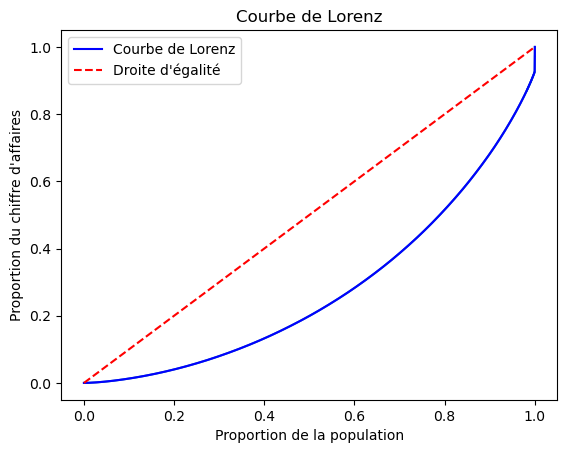

In [214]:
# calcul des quantités cumulées de revenus/richesses

cumulative_perc = np.cumsum(np.sort(repartition_CA_clients['price'])) / np.sum(repartition_CA_clients['price'])
cumulative_perc = np.insert(cumulative_perc, 0, 0)

# courbe de Lorenz
fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(cumulative_perc)), cumulative_perc, drawstyle='steps-post')
ax.plot(np.linspace(0,1,len(cumulative_perc)), cumulative_perc, color='blue', label='Courbe de Lorenz')
ax.plot([0,1], [0,1], color='red', linestyle='--', label='Droite d\'égalité')
ax.set_xlabel('Proportion de la population')
ax.set_ylabel("Proportion du chiffre d'affaires")
ax.set_title('Courbe de Lorenz')
ax.legend()
plt.show()

La courbe de lorenz est une mesure de concentration.

L'extrémité de la courbe de Lorez est asymptomatique verticale. En gros plus elle tend d'un coté, moins la répartion est égalitaire. dans notre cas, il y a une minorité de client qui constituent une majorité du chiffre d'affaires soit 7% du chiffre d'affaire total.

## IV- REPONSES AUX QUESTIONS DE JULIE

## 1- Faire une analyse plus ciblée sur les clients :

### 1-a le lien entre le genre d’un client et les catégories des livres achetés

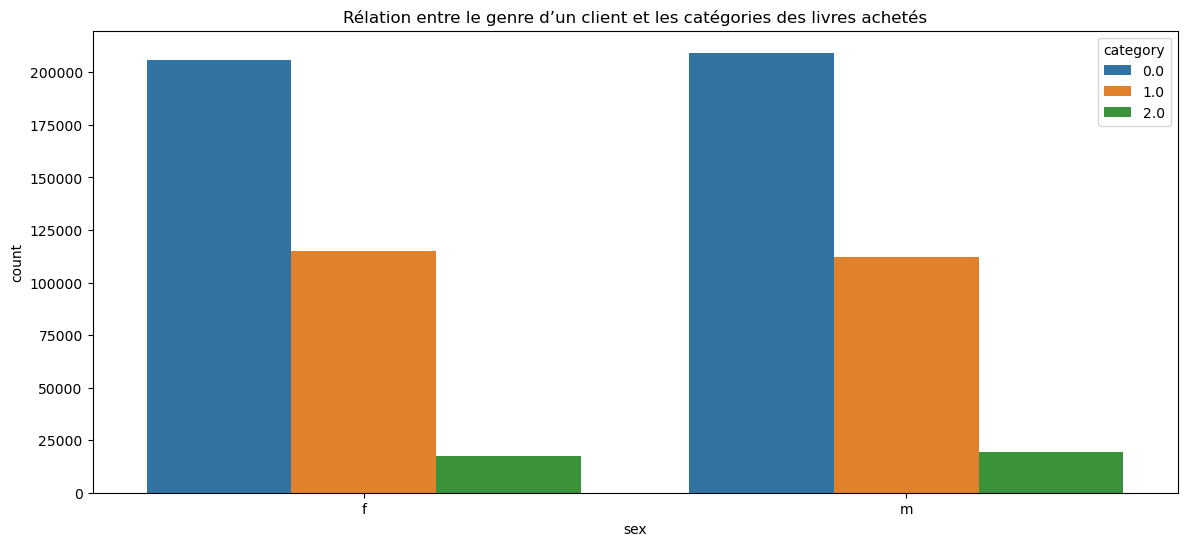

In [215]:
# Le lien entre le "genre" d’un client et les "catégories" des livres achetés (Diagramme a barre) 

plt.figure(figsize=(14,6))  # pour agrandire le graphique

sns.countplot(x = 'sex', hue = 'category', data = df_transactions_customers_products)
plt.title("Rélation entre le genre d’un client et les catégories des livres achetés")
plt.show()

HIPOTHESE

- Hypothèse nulle: Il n'y a pas de relation significative entre le genre d'un client et les catégories de livres achetés.

- Hypothèse alternative: Il existe une relation significative entre le genre d'un client et les catégories de livres achetés. 

In [216]:
# tableau de contingence entre le "genre" d’un client et les "catégories" des livres achetés

cont_table = pd.crosstab(df_transactions_customers_products['sex'],
            df_transactions_customers_products['category'])

In [217]:
cont_table

category,0.0,1.0,2.0
sex,,,
f,206103,114899,17283
m,209356,112270,19200


### 1-b Test de Chi2

In [218]:
# Test de Chi2

stats.chi2_contingency(cont_table, correction = True)

(147.11906816131497,
 1.1310980597090762e-32,
 2,
 array([[206952.24759281, 113159.50583189,  18173.2465753 ],
        [208506.75240719, 114009.49416811,  18309.7534247 ]]))

L'analyse statistique a révélé une p-valeur extrêmement faible de 1.1310980597090762e-32 pour le test d'indépendance entre le genre d'un client et les catégories de livres achetés. Cette p-valeur très faible suggère qu'il existe une association statistiquement significative et très forte entre le genre du client et les catégories de livres achetés. En d'autres termes, le genre est un facteur extrêmement important dans le choix des livres et il est peu probable que cette association soit due au hasard.

## 2- et ensuite le lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés.

### 2-a Calculons le montant total, la fréquence d'achat et le panier moyen

In [219]:
# Calcul du montant total des achats par client

montant_total = df_transactions_customers_products.groupby('birthday').sum()[['price']]

In [220]:
# Calcul de la fréquence d'achat par client

frequence_achat = df_transactions_customers_products.groupby('birthday').count()[['date']]

In [221]:
# Calcul de la taille du panier moyen par client

taille_panier_moyen = df_transactions_customers_products.groupby('birthday').mean()[['price']]

In [222]:
taille_panier_moyen = taille_panier_moyen.rename(columns={'price': 'panier_moyen'})

In [223]:
taille_panier_moyen

,panier_moyen
birthday,
1929.0,16.029104
1930.0,17.760487
1931.0,16.561471
1932.0,16.216045
1933.0,16.117638
...,...
2000.0,37.391339
2001.0,41.979704
2002.0,40.178305


In [224]:
# Joindre les données calculées en un seul dataframe

resultats = pd.concat([montant_total, frequence_achat, taille_panier_moyen], axis=1)

In [225]:
resultats

,price,date,panier_moyen
birthday,,,
1929.0,3221.85,201,16.029104
1930.0,4013.87,226,17.760487
1931.0,2815.45,170,16.561471
1932.0,5043.19,311,16.216045
1933.0,5254.35,326,16.117638
...,...,...,...
2000.0,165007.98,4413,37.391339
2001.0,178497.70,4252,41.979704
2002.0,184177.35,4584,40.178305


In [226]:
resultats = resultats.reset_index()

In [227]:
resultats

,birthday,price,date,panier_moyen
0,1929.0,3221.85,201,16.029104
1,1930.0,4013.87,226,17.760487
2,1931.0,2815.45,170,16.561471
3,1932.0,5043.19,311,16.216045
4,1933.0,5254.35,326,16.117638
...,...,...,...,...
71,2000.0,165007.98,4413,37.391339
72,2001.0,178497.70,4252,41.979704
73,2002.0,184177.35,4584,40.178305
74,2003.0,178195.78,4371,40.767737


### 2-b Affichons les graphiques et determinons le coéfficient de pearson entres les variables...

#### Le lien entre la variable "birthday" et "panier_moyen"

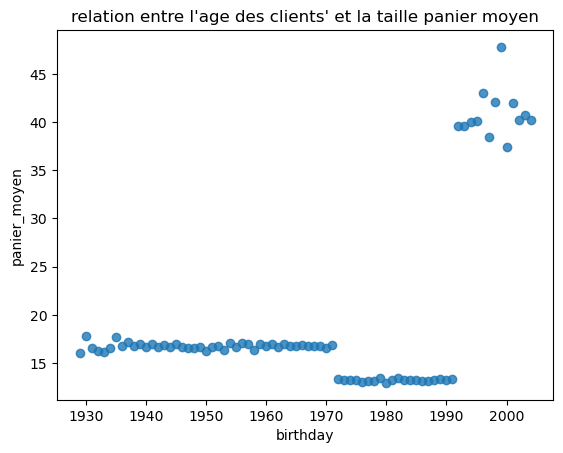

In [228]:
# Nuage de point entre la variable "birthday" et "panier_moyen"

sns.regplot(x='birthday',y='panier_moyen',fit_reg=False, data = resultats)
plt.title("relation entre l'age des clients' et la taille panier moyen")
plt.show()

- Hypothèse nulle : Il n'y a pas de relation significative entre l'âge des clients et le panier moyen dans une librairie.


- Hypothèse alternative : Il existe une relation significative entre l'âge des clients et le panier moyen , c'est-à-dire que le panier moyen des clients augmente ou diminue en fonction de leur âge.

#### Test de correlation entre les variables "birthday" et "panier_moyen"

In [229]:
# Coefficient de correlation de pearson 
  # entre les variable "birthday" et "panier_moyen" 

stats.pearsonr(resultats['birthday'],resultats['panier_moyen'])

PearsonRResult(statistic=0.5478614363791428, pvalue=3.0190378158491196e-07)

Le coefficient de corrélation de Pearson entre l'age des clients et le panier moyen est de 0,548, ce qui suggère une corrélation modérée positive entre ces deux variables. De plus, la p-valeur associée est très faible (3,02e-07), ce qui suggère une forte confiance dans cette corrélation. En d'autres termes, il est peu probable que cette corrélation soit due au hasard.

In [230]:
# Test de Normalité de Shapiro-Wilk

stats.shapiro(resultats['birthday'])

ShapiroResult(statistic=0.9549236297607422, pvalue=0.008753503672778606)

Le test de normalité de Shapiro-Wilk utilisé pour évaluer si la variable birthday suit une distribution normale. La statistique de test est de 0.9549236297607422 avec une p-valeur de 0.008753503672778606. Comme la p-valeur est inférieure au niveau de signification de 0,05, nous pouvons rejeter l'hypothèse nulle selon laquelle la variable suit une distribution normale. Cela suggère que la variable birthday ne suit probablement pas une distribution normale dans l'échantillon étudié. Il est important de noter cependant que les tests de normalité peuvent être influencés par la taille de l'échantillon et que les résultats doivent être interprétés avec précaution.

In [231]:
# Test de Normalité de Shapiro-Wilk

stats.shapiro(resultats['panier_moyen'])

ShapiroResult(statistic=0.609671950340271, pvalue=6.608714769006097e-13)

Le test de normalité de Shapiro-Wilk utilisé pour évaluer si la variable panier moyen suit une distribution normale. La statistique de test est de 0.609671950340271 avec une p-valeur de 6.608714769006097e-13. Comme la p-valeur est inférieure au niveau de signification de 0,05, nous pouvons rejeter l'hypothèse nulle selon laquelle la variable suit une distribution normale. Cela suggère que la variable panier moyen ne suit probablement pas une distribution normale dans l'échantillon étudié. Il est important de noter cependant que les tests de normalité peuvent être influencés par la taille de l'échantillon et que les résultats doivent être interprétés avec précaution.

In [232]:
# Test d'egalité des Variances

stats.levene(resultats['birthday'], resultats['panier_moyen'], center = 'mean')

LeveneResult(statistic=64.77400267963029, pvalue=2.37297028433904e-13)

Le test d'égalité des variances effectué pour évaluer si les variances des variables birthday et panier moyen sont égales. La statistique de test est de 64.77400267963029 avec une p-valeur de 2.37297028433904e-13. Étant donné que la p-valeur est inférieure au niveau de signification de 0,05, nous pouvons rejeter l'hypothèse nulle selon laquelle les variances des deux variables sont égales. Cela suggère qu'il existe une différence significative entre les variances des deux variables étudiées.

In [233]:
# Test non paramétrique de spearman

stats.spearmanr(resultats['birthday'],resultats['panier_moyen'])

SpearmanrResult(correlation=0.08650717703349281, pvalue=0.45745267914381693)

Le test de Spearman a été utilisé pour évaluer la corrélation entre l'âge des clients et le panier moyen, donnant une statistique de 0.08650717703349281 et une p-valeur de 0.45745267914381693. Avec une p-valeur supérieure à 0,05, nous ne pouvons pas rejeter l'hypothèse nulle selon laquelle il n'y a pas de corrélation significative entre l'âge des clients et le panier moyen. Cela suggère que l'âge des clients ne semble pas avoir d'impact significatif sur le montant de leur panier moyen.

#### Le lien entre la variable "birthday" et "date"

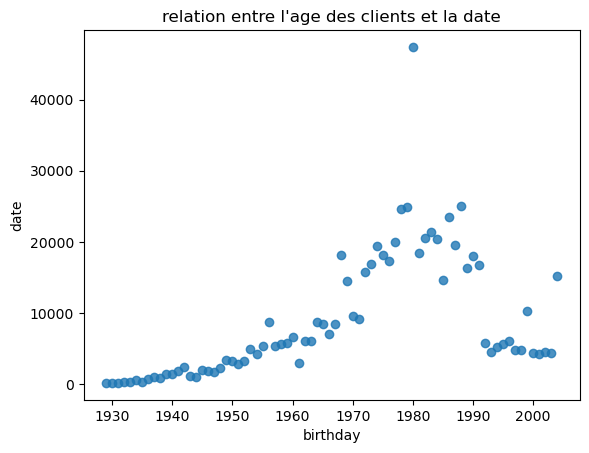

In [234]:
# Nuage de point entre la variable "birthday" et "date"

sns.regplot(x='birthday',y='date',fit_reg=False, data = resultats)
plt.title("relation entre l'age des clients et la date")
plt.show()

- Hypothèse nulle : Il n'y a pas de relation significative entre l'âge des clients et la date d'achat dans une librairie.


- Hypothèse alternative : Il existe une relation significative entre l'âge des clients et la date d'achat dans une librairie, c'est-à-dire que les clients plus âgés peuvent avoir tendance à effectuer des achats à des dates différentes de celles des clients plus jeunes, ou vice versa.

#### Test de correlation entre les variables "birthday" et "date"

In [235]:
# Coefficient de correlation de pearson 
  # entre les variable "birthday" et "date" 

stats.pearsonr(resultats['birthday'],resultats['date'])

PearsonRResult(statistic=0.5337344271238336, pvalue=6.876677470343373e-07)

Le coefficient de corrélation de Pearson entre l'âge des clients et la date est de 0,534, indiquant une corrélation modérée positive entre ces deux variables. De plus, la p-valeur associée est très faible (6,88e-07), ce qui suggère que cette corrélation est statistiquement significative. Cela signifie que l'âge des clients et la date sont liés de manière significative, bien qu'il soit important de noter que la corrélation ne prouve pas la causalité.

In [236]:
# Test de Normalité de Shapiro-Wilk

stats.shapiro(resultats['birthday'])

ShapiroResult(statistic=0.9549236297607422, pvalue=0.008753503672778606)

In [237]:
# Test de Normalité de Shapiro-Wilk

stats.shapiro(resultats['date'])

ShapiroResult(statistic=0.8338267207145691, pvalue=8.646505733622689e-08)

Le test de normalité de Shapiro-Wilk utilisé pour évaluer si la variable date suit une distribution normale. La statistique de test est de 0.8338267207145691 avec une p-valeur de 8.646505733622689e-08. Comme la p-valeur est inférieure au niveau de signification de 0,05, nous pouvons rejeter l'hypothèse nulle selon laquelle la variable suit une distribution normale. Cela suggère que la variable date ne suit probablement pas une distribution normale dans l'échantillon étudié. Toutefois, il est important de noter que les données de date peuvent ne pas être adaptées pour ce type de test car elles peuvent avoir une structure de série chronologique qui est différente de la distribution normale. Il convient donc d'être prudent dans l'interprétation des résultats de ce test pour la variable date.

In [238]:
# Test d'egalité des Variances

stats.levene(resultats['birthday'], resultats['date'], center = 'mean')

LeveneResult(statistic=135.75491842379225, pvalue=9.528030443990291e-23)

Le test d'égalité des variances effectué pour évaluer si les variances des variables birthday et date d'achat sont égales. La statistique de test est de 135.75491842379225 avec une p-valeur de 9.528030443990291e-23. Étant donné que la p-valeur est inférieure au niveau de signification de 0,05, nous pouvons rejeter l'hypothèse nulle selon laquelle les variances des deux variables sont égales. Cela suggère qu'il existe une différence significative entre les variances des deux variables étudiées.

In [239]:
# Test non paramétrique de spearman

stats.spearmanr(resultats['birthday'],resultats['date'])

SpearmanrResult(correlation=0.6845979808634354, pvalue=9.17297066447968e-12)

Le test de Spearman a été utilisé pour évaluer la corrélation entre l'âge des clients et la date d'achat dans une librairie, donnant une statistique de 0.6845979808634354 et une p-valeur de 9.17297066447968e-12. La p-valeur étant très faible, inférieure à 0,05, nous pouvons rejeter l'hypothèse nulle selon laquelle il n'y a pas de corrélation significative entre l'âge des clients et la date d'achat. Cela suggère qu'il existe une relation significative entre ces deux variables dans la librairie. La statistique de corrélation positive de 0.6845979808634354 indique que les clients plus âgés peuvent avoir tendance à acheter à des dates différentes de celles des clients plus jeunes. Cependant, il est important de noter que ce test ne permet pas de déterminer la direction de la relation de corrélation.

#### Le lien entre la variable "birthday" et "price"

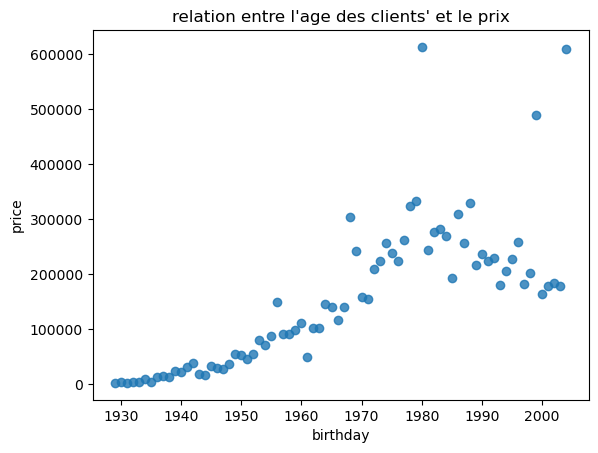

In [240]:
# Nuage de point entre la variable "birthday" et "price"

sns.regplot(x='birthday',y='price',fit_reg=False, data = resultats)
plt.title("relation entre l'age des clients' et le prix")
plt.show()

#### Test de correlation entre les variables "birthday" et "price"

In [241]:
# Coefficient de correlation de pearson 
  # entre les variable "birthday" et "price" 

stats.pearsonr(resultats['birthday'],resultats['price'])

PearsonRResult(statistic=0.7788810457116596, pvalue=1.1949535843461165e-16)

Le coefficient de corrélation de Pearson entre l'âge des clients et le prix est de 0,779, indiquant une corrélation positive forte entre ces deux variables. De plus, la p-valeur est très faible (1,19e-16), ce qui suggère que cette corrélation est statistiquement significative et peu probablement due au hasard. Cela indique que l'âge des clients est positivement associé avec le prix. Cependant, il est important de noter que la corrélation ne prouve pas de relation de causalité entre les deux variables.

In [242]:
# Test de Normalité de Shapiro-Wilk

stats.shapiro(resultats['birthday'])

ShapiroResult(statistic=0.9549236297607422, pvalue=0.008753503672778606)

In [243]:
# Test de Normalité de Shapiro-Wilk

stats.shapiro(resultats['price'])

ShapiroResult(statistic=0.8878951668739319, pvalue=6.316015515039908e-06)

Le test de normalité de Shapiro-Wilk utilisé pour évaluer si la variable prix suit une distribution normale. La statistique de test est de 0.8878951668739319 avec une p-valeur de 6.316015515039908e-06. Comme la p-valeur est inférieure au niveau de signification de 0,05, nous pouvons rejeter l'hypothèse nulle selon laquelle la variable suit une distribution normale. Cela suggère que la variable prix ne suit probablement pas une distribution normale dans l'échantillon étudié. Toutefois, il est important de noter que les tests de normalité peuvent être influencés par la taille de l'échantillon et que les résultats doivent être interprétés avec précaution.

In [244]:
# Test d'egalité des Variances

stats.levene(resultats['birthday'], resultats['price'], center = 'mean')

LeveneResult(statistic=125.60902593058448, pvalue=1.4631714477102273e-21)

Le test d'égalité des variances effectué pour évaluer si les variances des variables birthday et prix sont égales. La statistique de test est de 125.60902593058448 avec une p-valeur de 1.4631714477102273e-21. Étant donné que la p-valeur est inférieure au niveau de signification de 0,05, nous pouvons rejeter l'hypothèse nulle selon laquelle les variances des deux variables sont égales. Cela suggère qu'il existe une différence significative entre les variances des deux variables étudiées. En conséquence, cela peut avoir un impact sur les tests statistiques ultérieurs et il peut être nécessaire d'utiliser des méthodes alternatives pour analyser les données.

In [245]:
# Test non paramétrique de spearman

stats.spearmanr(resultats['birthday'],resultats['price'])

SpearmanrResult(correlation=0.8576076555023923, pvalue=4.57972879340901e-23)

Le test de Spearman a été utilisé pour évaluer la corrélation entre l'âge des clients et le prix de leurs achats dans cette librairie, donnant une statistique de 0.8576076555023923 et une p-valeur de 4.57972879340901e-23. La p-valeur étant très faible, inférieure à 0,05, nous pouvons rejeter l'hypothèse nulle selon laquelle il n'y a pas de corrélation significative entre l'âge des clients et le prix de leurs achats. Cela suggère qu'il existe une relation significative entre ces deux variables dans la librairie. La statistique de corrélation positive de 0.8576076555023923 indique que les clients plus âgés ont tendance à dépenser plus lors de leurs achats que les clients plus jeunes. Cependant, il est important de noter que ce test ne permet pas de déterminer la direction de la relation de corrélation.

### 2-c Matrice de corrélation 

In [246]:
# MATRICE DE CRRRELATION de toutes les variables

resultats.corr()

,birthday,price,date,panier_moyen
birthday,1.000000,0.778881,0.533734,0.547861
price,0.778881,1.000000,0.830299,0.249629
date,0.533734,0.830299,1.000000,-0.267318
panier_moyen,0.547861,0.249629,-0.267318,1.000000


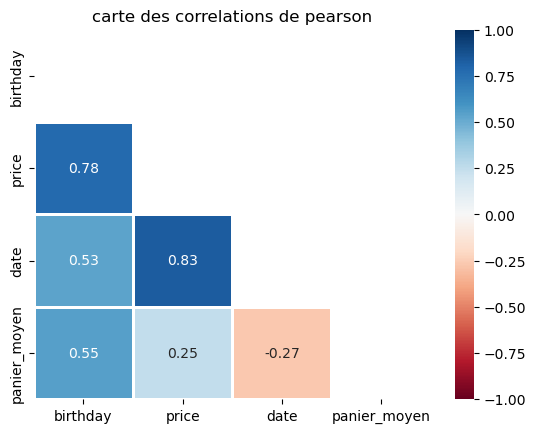

In [247]:
# CARTE DE CORRELATION AMELIOREE

mask = np.triu(np.ones_like(resultats.corr(), dtype='bool'))
sns.heatmap(resultats.corr(), mask=mask, center=0,
            cmap="RdBu", linewidths=1,
            annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title("carte des correlations de pearson")
plt.show()

### 2-d Les catégories des livres achetés

### Test ANOVA

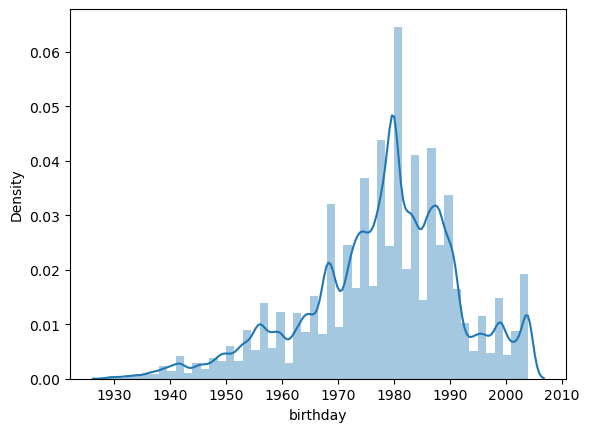

In [248]:
# Distibution de la variable "category"

sns.distplot(df_transactions_customers_products['birthday'], kde=True)
plt.show()

In [249]:
df_categories = stats.f_oneway(df_transactions_customers_products['birthday'],
                        df_transactions_customers_products['category'])

In [250]:
df_categories

F_onewayResult(statistic=14380697121.165258, pvalue=0.0)

Le test ANOVA entre l'âge des clients et la catégorie des livres a montré une statistique de 14380697121.16 et une p-valeur très faible de 0.0, indiquant que les moyennes d'âge entre les différentes catégories de livres diffèrent significativement. Autrement dit, la catégorie de livre acheté est un facteur significatif dans l'explication de la variance de l'âge des clients. Cela suggère que les clients d'âges différents ont tendance à acheter des livres dans des catégories différentes. Cependant, il est important de noter que le test ANOVA ne prouve pas de relation de causalité entre les variables, mais seulement une association statistique significative.